# Jonathan Halverson
# Friday, September 29, 2017
# Geron: Chapter 3 on Classification

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
import numpy as np

X, y = mnist['data'], mnist['target']
X = X.astype(np.float64)
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
digit_index = 36000
y[digit_index]

5.0

In [6]:
X[digit_index].astype(np.int)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

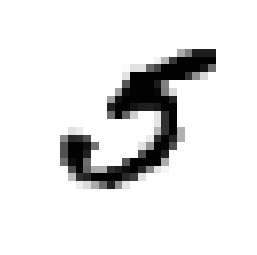

In [8]:
plt.imshow(X[digit_index].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')

The data is already divided into a train and test set (at record 60000):

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.transform(X_test)

(array([  980.,  1135.,  1032.,  1010.,   982.,   892.,   958.,  1028.,
          974.,  1009.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Patch objects>)

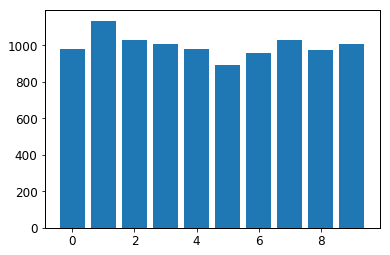

In [12]:
plt.hist(y_test, bins=np.linspace(-0.5, 9.5, 11), rwidth=0.8)

We see from the histogram above that the classes are not perfectly balanced.

### Training a binary classifier

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5 = y_train_5.astype(np.int)
y_test_5 = y_test_5.astype(np.int)

In [14]:
y_train_5[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [15]:
y_train[:15]

array([ 4.,  0.,  0.,  3.,  9.,  0.,  3.,  8.,  1.,  6.,  4.,  4.,  5.,
        1.,  5.])

In [16]:
y_train_5.sum()

5421

In [17]:
from sklearn.linear_model import SGDClassifier

Below we use the test data which is in general bad practice at this point.

In [18]:
# Defaults to ‘hinge’, which gives a linear SVM
model = SGDClassifier(random_state=42)
model = model.fit(X_train_std, y_train_5)
y_pred = model.predict(X_test_std)

In [19]:
model.intercept_

array([-967.04136634])

In [20]:
model.classes_

array([0, 1])

In [21]:
model.coef_

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -5.51747852e-01,  -7.18685674e-01,  -5.09841598e-01,
         -5.09841598e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -5.09841598e-01,
         -5.88165350e-01,  -5.25566258e+00,  -4.80923842e+00,
         -2.08991799e+00,  -2.40837241e+00,  -3.08111611e+00,
         -3.63051010e+00,  -3.82053770e+00,  -3.89189080e+00,
         -3.99165564e+00,  -4.07719062e+00,  -4.92290743e+00,
         -3.54463588e+00,  -2.88722014e+00,  -2.39360752e+00,
        

In [22]:
model.t_

300001.0

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_pred, y_test_5)

0.97040000000000004

We see that the accuracy appears high. It is important to note that only about 10% of the targets are fives so accuracy is not the best metric.

In [25]:
# a prediction of 0 means not 5
model.predict(std_sc.transform([X_train[digit_index]]))

array([0])

In [26]:
# a prediction of 0 means not 5
model.predict([X_train[digit_index]])

array([0])

In [27]:
y_train[digit_index]

6.0

Now we do things more properly as opposed to the quick test above. The cross_val_score is nice because it doesn't touch the test data.

In [28]:
# For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass,
# StratifiedKFold is used. In all other cases, KFold is used.
from sklearn.model_selection import cross_val_score

y_train_scores = cross_val_score(SGDClassifier(random_state=42), X_train_std, y_train_5, cv=5, scoring='accuracy')
y_train_scores

array([ 0.96750271,  0.96883333,  0.96725   ,  0.96791667,  0.96708059])

The cross_val_predict method gives the individual prediction for each case when it appears in the validation set, which happens only once during the cross validation procedure.

In [29]:
from sklearn.model_selection import cross_val_predict

# the decision function scores
y_train_pred = cross_val_predict(SGDClassifier(random_state=42), X_train_std, y_train_5, cv=5, method='decision_function')
y_train_pred

array([ -901.57501766, -1470.53222362,  -750.68474979, ..., -1720.43066801,
        -141.29681024,  -843.37099454])

In [30]:
# the actual predictions
y_train_predict = cross_val_predict(SGDClassifier(random_state=42), X_train, y_train_5, cv=5)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix

Still working with the training set here:

In [32]:
confusion_matrix(y_true=y_train_5, y_pred=y_train_predict)

array([[53461,  1118],
       [ 1335,  4086]])

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_predict)

0.78516525749423516

In [34]:
recall_score(y_train_5, y_train_predict)

0.75373547315993361

In [35]:
f1_score(y_train_5, y_train_predict)

0.76912941176470595

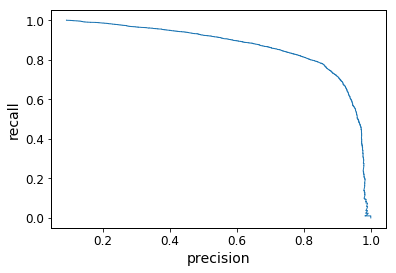

In [36]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_train_pred)
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')

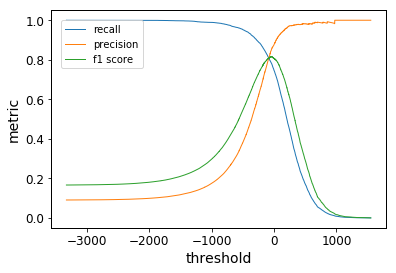

In [37]:
plt.plot(thresholds, recall[:-1], label='recall')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, 2.0 / (1.0 / recall[:-1] + 1.0 / precision[:-1]), label='f1 score')
plt.xlabel('threshold')
plt.ylabel('metric')
plt.legend()

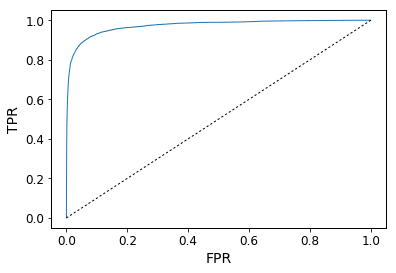

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_train_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('FPR')
plt.ylabel('TPR')

That concludes what we will do for binary classification. Let's move on the entire data set where we consider multiclass classification.

### Multiclass classification

In [39]:
# now y_train instead of y_train_5
y_train_predict = cross_val_predict(SGDClassifier(random_state=42), X_train_std, y_train, cv=5)
accuracy_score(y_train, y_train_predict)

0.91005000000000003

In [40]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[5739,    2,   19,   10,    9,   43,   43,   10,   44,    4],
       [   1, 6469,   43,   29,    6,   38,    9,   10,  123,   14],
       [  54,   32, 5326,  104,   79,   22,  100,   60,  166,   15],
       [  46,   42,  141, 5345,    1,  217,   37,   58,  140,  104],
       [  19,   24,   43,    9, 5388,    8,   54,   31,   90,  176],
       [  72,   39,   38,  193,   73, 4574,  115,   30,  193,   94],
       [  34,   25,   45,    2,   40,   87, 5629,    7,   49,    0],
       [  19,   18,   72,   25,   56,   11,    6, 5829,   16,  213],
       [  46,  146,   73,  150,   12,  136,   56,   23, 5072,  137],
       [  39,   36,   28,   91,  176,   33,    2,  223,   89, 5232]])

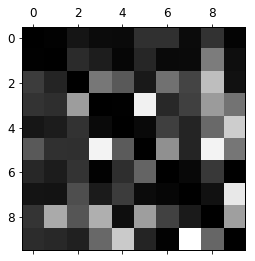

In [41]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums.astype(np.float64)
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X_train_std_pca = pca.fit_transform(X_train_std)

In [43]:
X_train_std_pca.shape

(60000, 149)

In [44]:
y_train_predict = cross_val_predict(SGDClassifier(random_state=42), X_train_std_pca, y_train, cv=5)
accuracy_score(y_train, y_train_predict)

0.90549999999999997

We see that the accuracy has not changed very much even though we have reduced the dimensionality of the data by 149/784. Next we try a different model:

In [45]:
y_train_predict = cross_val_predict(SGDClassifier(loss='log'), X_train_std, y_train, cv=5)
accuracy_score(y_train, y_train_predict)

0.91090000000000004

Let's put everything together in a pipeline:

In [46]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=0.8))])
X_train_prepared = pipeline.fit_transform(X_train)
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [47]:
X_test_prepared = pipeline.transform(X_test)
accuracy_score(y_test, sgd_clf.predict(X_test_prepared))

0.90580000000000005

Previous notebooks have included the model into the pipeline which makes no sense because the parameters found in the standard scaler, for instance, should be used to treat the test data.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
X_test_prepared = pipeline.transform(X_test)
accuracy_score(y_test, rf_clf.predict(X_test_prepared))

0.94289999999999996

We see by going to RF we get an immediate improvement. One could try more trees in the ensemble or do a better job with the dimensionality reduction. For instance, let's try using LLE to reduce dimensions (we only consider the first 5000 digits to speed up the computations):

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

pipeline = Pipeline([('std', StandardScaler()), ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=100))])
X_train_prepared = pipeline.fit_transform(X_train[:5000])
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_prepared, y_train[:5000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
X_test_prepared = pipeline.transform(X_test)
accuracy_score(y_test, rf_clf.predict(X_test_prepared))

0.89180000000000004

#### Pipeline with GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

pline = Pipeline([('std_sc', StandardScaler()), ('pca', PCA()), ('rf', RandomForestClassifier())])
param_grid = [{'pca__n_components':[10, 50, 100]}]
grid_search = GridSearchCV(pline, param_grid, cv=5, refit=True)
grid_search.fit(X_train, y_train)

Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
          ...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [54]:
accuracy_score(y_test, grid_search.predict(X_test))

0.8538